In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform

Mount Google Drive

In [21]:
# from google.colab import drive
# drive.mount('/content/drive')

Check file path

In [22]:
# !ls "drive/MyDrive/Assignments/DSGP(Diabetes)"

Load the dataset

In [23]:
# file_path = 'drive/MyDrive/Assignments/DSGP(Diabetes)/Data/diabetes_012_health_indicators_BRFSS2015.csv'

In [24]:
diabetes = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

Drop the 'Income' column

In [25]:
diabetes = diabetes.drop(columns=['Income'])

In [26]:
diabetes

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0


Define features (X) and target (y)

In [27]:
X = diabetes[['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'MentHlth', 'DiffWalk', 'Sex', 'Age']]

In [28]:
X

,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,MentHlth,DiffWalk,Sex,Age
0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,18.0,1.0,0.0,9.0
1,0.0,0.0,25.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
2,1.0,1.0,28.0,0.0,0.0,1.0,0.0,30.0,1.0,0.0,9.0
3,1.0,0.0,27.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,11.0
4,1.0,1.0,24.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0
253676,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0
253677,0.0,0.0,28.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
253678,1.0,0.0,23.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,7.0


In [29]:
y = diabetes['Diabetes_012']

In [30]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 253680, dtype: float64

Check class distribution

In [31]:
print("Class Distribution:\n", y.value_counts()/len(y))

Class Distribution:
 Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: count, dtype: float64


Scale features

In [32]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Split into train and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

Handle class imbalance using SMOTE

Hyperparameter tuning using GridSearchCV for RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import pandas as pd
from scipy.stats import randint
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Create a pipeline that first applies SMOTE, then fits the classifier
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter distribution for the RandomForest inside the pipeline
param_dist_rf = {
    'rf_classifier__n_estimators': randint(50, 200),
    'rf_classifier__max_depth': [None, 10, 20],
    'rf_classifier__min_samples_split': randint(2, 10),
    'rf_classifier__min_samples_leaf': randint(1, 5)
}

# Use StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Enable return_train_score to capture training scores
random_rf = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist_rf,
    scoring='f1_macro',
    cv=skf,
    n_iter=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

# Fit the model using the SMOTE augmented training data
random_rf.fit(X_train, y_train)

# Create a DataFrame with the parameters and scores
results_df = pd.DataFrame(random_rf.cv_results_)
sorted_results_df = results_df.sort_values(by="mean_test_score", ascending=False)
sorted_results_df[['params', 'mean_train_score', 'mean_test_score']]

Fitting 3 folds for each of 5 candidates, totalling 15 fits


,params,mean_train_score,mean_test_score
3,"{'rf_classifier__max_depth': 20, 'rf_classifie...",0.580270,0.431680
0,"{'rf_classifier__max_depth': 20, 'rf_classifie...",0.578986,0.431254
1,"{'rf_classifier__max_depth': 20, 'rf_classifie...",0.579399,0.431147
4,"{'rf_classifier__max_depth': 20, 'rf_classifie...",0.607461,0.428728
2,"{'rf_classifier__max_depth': 20, 'rf_classifie...",0.618863,0.428474


In [35]:
from IPython.core.display import HTML

html_table = sorted_results_df[['params', 'mean_train_score', 'mean_test_score']].to_html(index=False)
HTML(html_table)

params,mean_train_score,mean_test_score
"{'rf_classifier__max_depth': 20, 'rf_classifier__min_samples_leaf': 4, 'rf_classifier__min_samples_split': 6, 'rf_classifier__n_estimators': 149}",0.580270,0.431680
"{'rf_classifier__max_depth': 20, 'rf_classifier__min_samples_leaf': 4, 'rf_classifier__min_samples_split': 6, 'rf_classifier__n_estimators': 64}",0.578986,0.431254
"{'rf_classifier__max_depth': 20, 'rf_classifier__min_samples_leaf': 4, 'rf_classifier__min_samples_split': 6, 'rf_classifier__n_estimators': 70}",0.579399,0.431147
"{'rf_classifier__max_depth': 20, 'rf_classifier__min_samples_leaf': 2, 'rf_classifier__min_samples_split': 6, 'rf_classifier__n_estimators': 51}",0.607461,0.428728
"{'rf_classifier__max_depth': 20, 'rf_classifier__min_samples_leaf': 2, 'rf_classifier__min_samples_split': 4, 'rf_classifier__n_estimators': 124}",0.618863,0.428474


Best parameters and model evaluation

In [36]:
print("\nBest Random Forest Parameters:", random_rf.best_params_)
rf_best = random_rf.best_estimator_
rf_predictions = rf_best.predict(X_test)


Best Random Forest Parameters: {'rf_classifier__max_depth': 20, 'rf_classifier__min_samples_leaf': 4, 'rf_classifier__min_samples_split': 6, 'rf_classifier__n_estimators': 149}


In [37]:
rf_f1_score = f1_score(y_test, rf_predictions, average='macro')
print("\nRandom Forest F1 Score:", rf_f1_score)
print(classification_report(y_test, rf_predictions))


Random Forest F1 Score: 0.4305096588648805
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85     64111
         1.0       0.03      0.06      0.04      1389
         2.0       0.32      0.54      0.41     10604

    accuracy                           0.74     76104
   macro avg       0.42      0.46      0.43     76104
weighted avg       0.81      0.74      0.77     76104



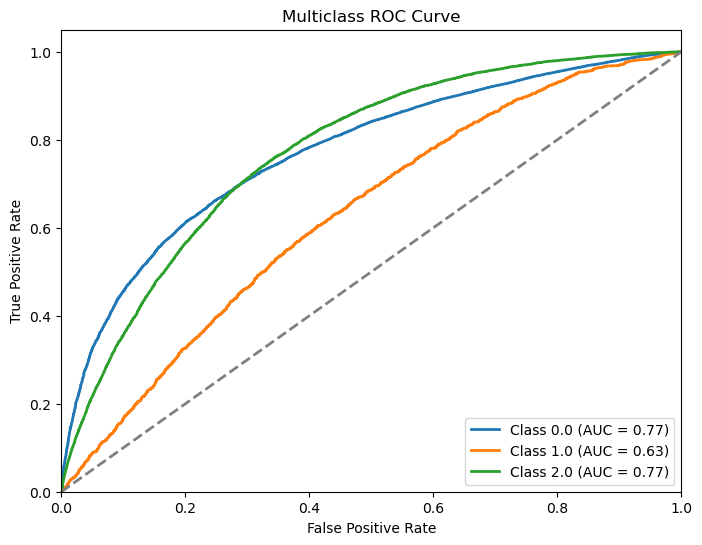

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test contains the true labels and lr_clf is already trained
# Get unique classes and binarize the labels
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_score = rf_best.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import pandas as pd
from scipy.stats import randint

# Initialize the balanced random forest classifier; it adjusts class weights internally
rf_classifier = BalancedRandomForestClassifier(random_state=42)

# Define the parameter distribution for the classifier
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Use StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Enable return_train_score to capture training scores
random_rf = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_dist_rf,
    scoring='f1_macro',
    cv=skf,
    n_iter=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

# Fit the model using the training data
random_rf.fit(X_train, y_train)

# Create a DataFrame with the parameters and scores
results_df = pd.DataFrame(random_rf.cv_results_)
sorted_results_df = results_df.sort_values(by="mean_test_score", ascending=False)
sorted_results_df[['params', 'mean_train_score', 'mean_test_score']]

Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


,params,mean_train_score,mean_test_score
3,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.421934,0.394290
1,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.420513,0.393153
0,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.420041,0.393056
2,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.427434,0.385539
4,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.423295,0.385330


In [40]:
from IPython.core.display import HTML

html_table = sorted_results_df[['params', 'mean_train_score', 'mean_test_score']].to_html(index=False)
HTML(html_table)

params,mean_train_score,mean_test_score
"{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 149}",0.421934,0.394290
"{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 70}",0.420513,0.393153
"{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 64}",0.420041,0.393056
"{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 124}",0.427434,0.385539
"{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 51}",0.423295,0.385330


In [41]:
print("\nBest Random Forest Parameters:", random_rf.best_params_)
rf_best = random_rf.best_estimator_
rf_predictions = rf_best.predict(X_test)


Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 149}


In [42]:
rf_f1_score = f1_score(y_test, rf_predictions, average='macro')
print("\nRandom Forest F1 Score:", rf_f1_score)
print(classification_report(y_test, rf_predictions))


Random Forest F1 Score: 0.39437775154457183
              precision    recall  f1-score   support

         0.0       0.95      0.60      0.73     64111
         1.0       0.02      0.32      0.05      1389
         2.0       0.32      0.55      0.40     10604

    accuracy                           0.59     76104
   macro avg       0.43      0.49      0.39     76104
weighted avg       0.84      0.59      0.67     76104



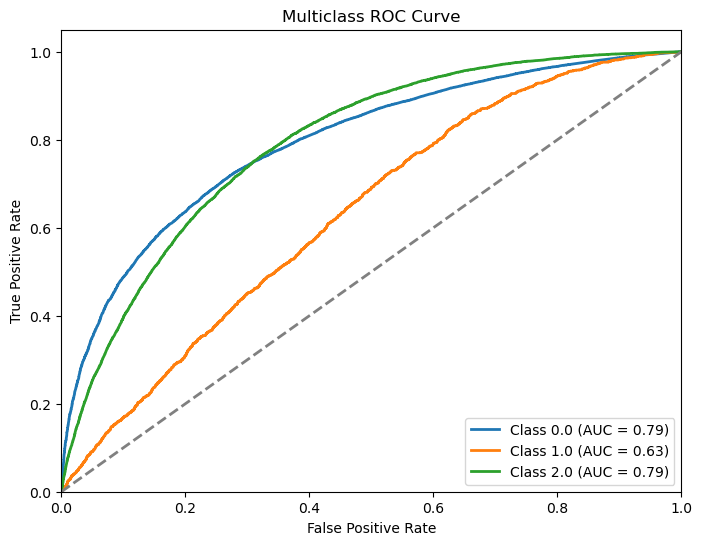

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test contains the true labels and lr_clf is already trained
# Get unique classes and binarize the labels
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_score = rf_best.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

Train GradientBoostingClassifier with GridSearchCV

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
from scipy.stats import randint, uniform
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Create a pipeline that first applies SMOTE, then fits the classifier
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('gb_clf', GradientBoostingClassifier(random_state=42))
])

# Define the parameter distribution for the GradientBoostingClassifier inside the pipeline
param_dist_gb = {
    'gb_clf__n_estimators': [50, 150, 200],
    'gb_clf__learning_rate': [0.01, 0.1, 0.2],
    'gb_clf__max_depth': [3, 5, 7]
}

# Enable return_train_score to capture training scores
random_gb = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist_gb,
    scoring='f1_macro',
    cv=3,
    n_iter=1,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

# Fit the model using the SMOTE augmented training data
random_gb.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('gb_clf',
                                              GradientBoostingClassifier(random_state=42))]),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'gb_clf__learning_rate': [0.01, 0.1,
                                                                  0.2],
                                        'gb_clf__max_depth': [3, 5, 7],
                                        'gb_clf__n_estimators': [50, 150, 200]},
                   random_state=42, return_train_score=True, scoring='f1_macro',
                   verbose=1)

Best parameters and model evaluation for GradientBoosting

In [47]:
# Create a DataFrame with the parameters and scores
results_df = pd.DataFrame(random_gb.cv_results_)
sorted_results_df = results_df.sort_values(by="mean_test_score", ascending=False)
sorted_results_df[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'gb_clf__n_estimators': 200, 'gb_clf__max_dep...",0.442234,0.433121


In [48]:
print("\nBest Gradient Boosting Parameters:", random_gb.best_params_)
gb_best = random_gb.best_estimator_
gb_predictions = gb_best.predict(X_test)


Best Gradient Boosting Parameters: {'gb_clf__n_estimators': 200, 'gb_clf__max_depth': 7, 'gb_clf__learning_rate': 0.01}


In [49]:
gb_f1_score = f1_score(y_test, gb_predictions, average='macro')
print("\nGradient Boosting F1 Score:", gb_f1_score)
print(classification_report(y_test, gb_predictions))


Gradient Boosting F1 Score: 0.4388805223500571
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     64111
         1.0       0.04      0.04      0.04      1389
         2.0       0.33      0.60      0.43     10604

    accuracy                           0.75     76104
   macro avg       0.43      0.48      0.44     76104
weighted avg       0.82      0.75      0.78     76104



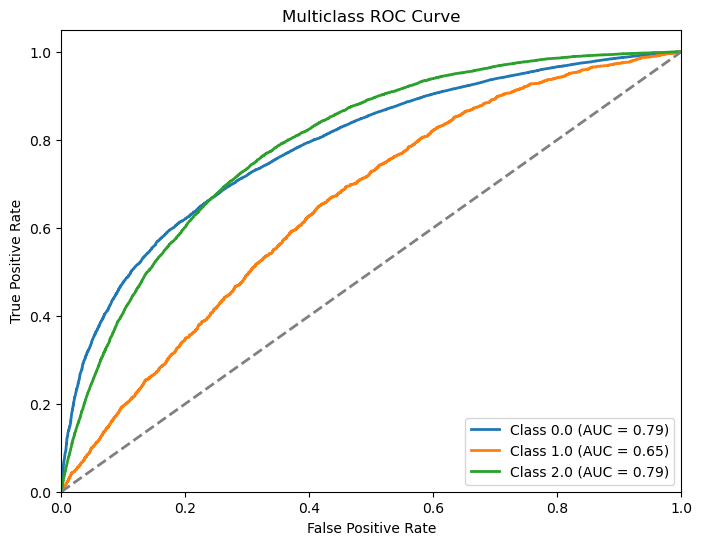

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test contains the true labels and lr_clf is already trained
# Get unique classes and binarize the labels
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_score = gb_best.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

Decision Tree for baseline comparison

In [54]:
dt_clf = DecisionTreeClassifier(random_state=42)
# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)

In [55]:

dt_f1_score = f1_score(y_test, dt_predictions, average='macro')
print("\nDecision Tree F1 Score:", dt_f1_score)
print(classification_report(y_test, dt_predictions))


Decision Tree F1 Score: 0.39816860030461126
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87     64111
         1.0       0.03      0.03      0.03      1389
         2.0       0.28      0.31      0.29     10604

    accuracy                           0.77     76104
   macro avg       0.40      0.40      0.40     76104
weighted avg       0.78      0.77      0.77     76104



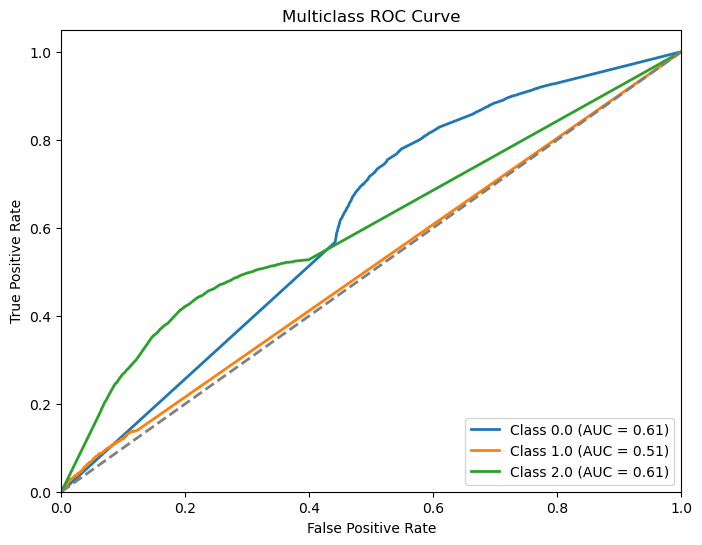

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test contains the true labels and lr_clf is already trained
# Get unique classes and binarize the labels
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_score = dt_clf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42, max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)

In [58]:

lr_f1_score = f1_score(y_test, lr_predictions, average='macro')
print("\nDecision Tree F1 Score:", lr_f1_score)
print(classification_report(y_test, lr_predictions, zero_division=0))


Decision Tree F1 Score: 0.41035372417711624
              precision    recall  f1-score   support

         0.0       0.94      0.65      0.77     64111
         1.0       0.03      0.23      0.05      1389
         2.0       0.32      0.59      0.42     10604

    accuracy                           0.63     76104
   macro avg       0.43      0.49      0.41     76104
weighted avg       0.84      0.63      0.71     76104



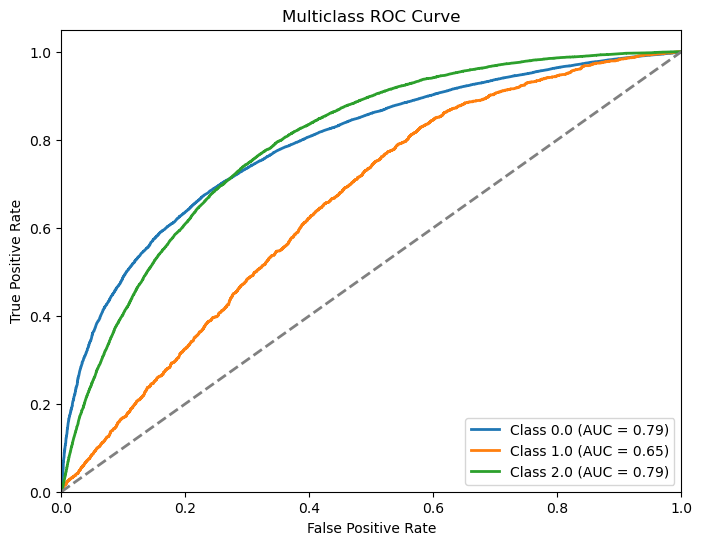

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test contains the true labels and lr_clf is already trained
# Get unique classes and binarize the labels
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_score = lr_clf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()